<a href="https://colab.research.google.com/github/kaveku/test-live-coding/blob/master/Angela_Munyao_Perceptron_Tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Please make a copy of the notebook before you start updating it.

# Import libraries and load the data from sklearn dataset

In [143]:
 ### Import packages

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

In [144]:
### Import datasets from sklearn.datasets
data = load_iris()

In [145]:
data

{'DESCR': '.. _iris_dataset:\n\nIris plants dataset\n--------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n                \n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)\n    ===========

In [146]:
#### Target 

target = data.target

In [147]:
### Count the number of uniques values

N_= np.unique(target)

In [148]:
print('the unique values in the targets are', N_)

the unique values in the targets are [0 1 2]


In [149]:
target.shape

(150,)

## Remove the class 2 in our dataset in order to have a binary classification problem

In [150]:
##############
target=data.target
y=target[target!=2]
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [151]:
y.shape

(100,)

## Replace all 0 in the target by -1 using numpy

In [152]:
#############
# your code here
###########
y[y==0] =-1


In [153]:
y

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

In [154]:
### Inputs values
Inputs = data.data
#INPUTSInputs[0:100]

In [155]:
Inputs.shape

(150, 4)

## Let's remove the last 50 rows in the inputs data (they belong to the class 2)

In [156]:
#### New Input
X = Inputs[:100,:]

In [157]:
X.shape

(100, 4)

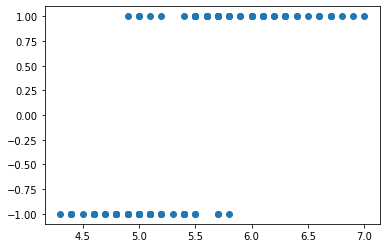

In [158]:
plt.scatter(X[:, 0], y)

## Combines the dataset and Shuffle them using numpy

In [159]:
X.shape[0]

### Combines the input X and the target y
## shuffle the data
dataset=np.c_[X,y]
np.random.seed(3)
np.random.shuffle(dataset)


## Split the data into (X_train, Y_train), (X_test, Y_test):  80% for training and 20% for test

In [160]:
len(dataset)

100

In [161]:
#########
# your code here
p=0.8
split=int(len(dataset)*p)
x_train=dataset[:split,: -1]
x_test=dataset[split:,:-1]
y_train=dataset[:split, -1]
y_test=dataset[split:,-1]

In [162]:
dataset.shape

(100, 5)

In [163]:
split

80

In [164]:
print(x_train.shape)

(80, 4)


In [165]:
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)
print(len(y_test))

(80,)
(20, 4)
(20,)
20


## Implement the class Perceptron

$ŷ[i] = Θ^TX[i]$

if  $y[i]*np.sign(ŷ[i]) <= 0$:

        update Θ: Θ = Θ + y[i]*X[i]
else:

      Θ = Θ

## For prediction: 

np.sign(X @ Θ)

In [ ]:
len(x_test)

In [166]:
class perceptron:
    #eps = 1e-2
    def __init__(self, X, Y,theta,iter_= 100):
        self.X = X
        self.Y = Y
        self.iter_ = iter_
        self.theta = theta.reshape(-1,1)
    def predict(self,x):
      yPred = np.sign(x @self.theta)
      return yPred
    def train(self):
      #self.theta=np.add_ones
      for i in range(self.iter_):
        for g in range(len(self.Y)):
          y_pred= np.sign(self.X[g].reshape(-1,1).T@self.theta.reshape(-1,1))
          if (self.Y[g]*(y_pred) <= 0):
            self.theta= self.theta + self.Y[g]*self.X[g].reshape(-1,1)
      return self.theta
          #loop over the number of iteration and the number of example
        # compute the output of the model and update theta if necessary
        
    def accuracy(self,X,Y):
      pred=self.predict(X)
      correctly=0
      for i in range(len(Y)):
        if pred[i]==Y[i]:
          correctly=correctly+1
      
      return (correctly/len(X))*100
        ## number of correctly predicted examples * 100

In [168]:
x_train.shape

(80, 4)

In [169]:
y_test.shape

(20,)

In [170]:
perceptron = perceptron(x_train,y_train,np.random.rand(4)*1e-4)

In [171]:
perceptron.train()

array([[-0.99992761],
       [-4.69995249],
       [ 6.50005967],
       [ 3.1000067 ]])

In [172]:
perceptron.predict(x_test)

array([[ 1.],
       [-1.],
       [ 1.],
       [-1.],
       [-1.],
       [-1.],
       [-1.],
       [-1.],
       [-1.],
       [ 1.],
       [-1.],
       [-1.],
       [ 1.],
       [-1.],
       [-1.],
       [-1.],
       [ 1.],
       [ 1.],
       [-1.],
       [-1.]])

In [173]:
len(x_test)

20

In [174]:
perceptron.accuracy(x_test, y_test)

100.0

In [175]:
np.sum(y_test==perceptron.predict(x_test))

232